<a href="https://colab.research.google.com/github/iupui-soic/pybootcamp/blob/main/saptarshi_day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --user scikit-learn==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

/root/.local/lib/python3.8/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Looking at the data

In [3]:
print(mnist.keys())
X, y = mnist.data, mnist.target
X

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
print(X.shape)
y

(70000, 784)


array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Binary Classification Model

In [6]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')
y_test_5

array([False, False, False, ..., False,  True, False])

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=100)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=100)

array([False])

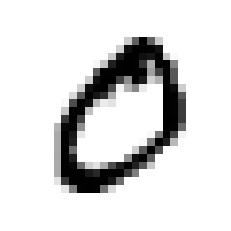

In [8]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

plot_digit(X[1])
sgd_clf.predict([X[1]])

array([ True])

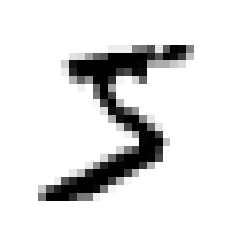

In [9]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

plot_digit(X[0])
sgd_clf.predict([X[0]])

## Performance Metrics (CV)


In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9645 , 0.96325, 0.9602 ])

In [11]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [12]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53878,   701],
       [ 1540,  3881]])

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision = ", precision_score(y_train_5, y_train_pred))
print("Recall = ", recall_score(y_train_5, y_train_pred))
print("F1 score = ", f1_score(y_train_5, y_train_pred))

Precision =  0.8470100392841554
Recall =  0.7159195720346799
F1 score =  0.7759672098370489


## Precision-Recall Curve

In [14]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

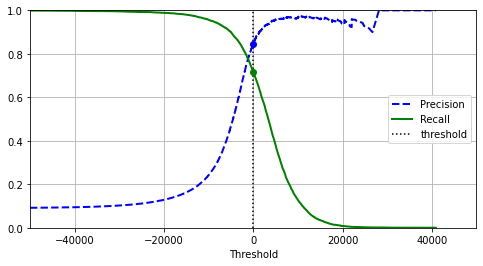

In [15]:
threshold = 0
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

### ROC curve

In [16]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

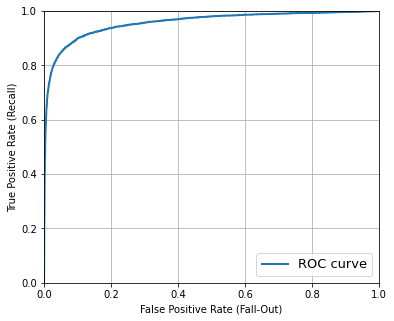

In [17]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

In [18]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9570719993184639

### Random Forest instead of SGD Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=100)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [20]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)

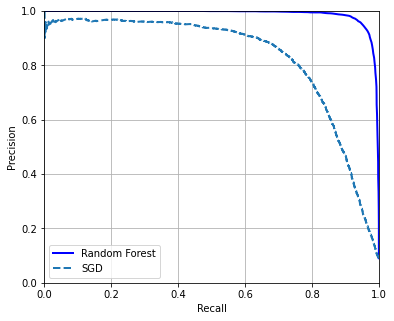

In [21]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [22]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5
roc_auc_score(y_train_5, y_scores_forest)

0.9983688342866334

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision = ", precision_score(y_train_5, y_train_pred_forest))
print("Recall = ", recall_score(y_train_5, y_train_pred_forest))
print("F1 score = ", f1_score(y_train_5, y_train_pred_forest))

Precision =  0.9883381924198251
Recall =  0.8754842280022136
F1 score =  0.928494571065245


## Multiclass Classification

In [24]:
sgd_clf = SGDClassifier(random_state=100)
sgd_clf.fit(X_train, y_train)
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8723 , 0.85635, 0.88385])

In [25]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision = ", precision_score(y_train, y_train_pred, average='macro'))
print("Recall = ", recall_score(y_train, y_train_pred, average='macro'))
print("F1 score = ", f1_score(y_train, y_train_pred, average='macro'))

Precision =  0.8720316595796088
Recall =  0.8685604187825817
F1 score =  0.8686863396522334
